# IPW v2: `Re78` - `Re75`

In [1]:
import sys

In [2]:
# append parent directory to use utils
sys.path.append("../")

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from utils.bootstrap import bootstrap, bootstrap_experiment
from utils.prop_utils import ipw

In [4]:
lalonde_exp = pd.read_csv("../data/lalonde_exp.csv")
lalonde_obs = pd.read_csv("../data/lalonde_psid.csv")

In [5]:
lalonde_exp.shape, lalonde_obs.shape

((445, 13), (2675, 13))

In [6]:
lalonde_exp["re78_re75"] = lalonde_exp["re78"] - lalonde_exp["re75"]
lalonde_obs["re78_re75"] = lalonde_obs["re78"] - lalonde_obs["re75"]

Our average treatment effect is now a difference of differences

$\beta = E[Y^a - Y^{a'}] = E[(Re_{78} - Re_{75})^{a} - (Re_{78} - Re_{75})^{a'}]$

## Experimental Data

In [7]:
ipw_result = ipw(
    lalonde_exp,
    "treat",
    "re78_re75",
    ["age", "education", "black", "hispanic", "married", "re74"],
)
print(
    f"The difference between the treatment and no-treatment groups is {ipw_result:.2f}."
)

The difference between the treatment and no-treatment groups is 1395.03.


In [8]:
ipw_results = bootstrap_experiment(
    df=lalonde_exp,
    function=ipw,
    num_exp=10,
    n=50,
    ci=95,
    treatment_col="treat",
    outcome_col="re78_re75",
    confounder_cols=[
        "age",
        "education",
        "black",
        "hispanic",
        "married",
        "re74",
    ],
)

Running experiments: 100%|███████████████████████████████████████████████████████████████████████████| 10/10 [00:04<00:00,  2.04it/s]


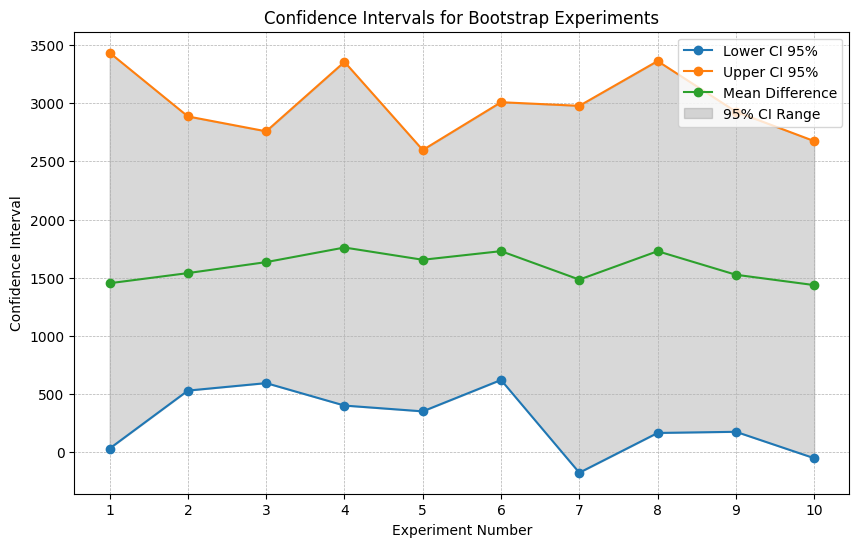

In [9]:
ci_df = pd.DataFrame(ipw_results, columns=["mean", "lower_ci", "upper_ci"])
ci_df["experiment"] = range(1, len(ci_df) + 1)

plt.figure(figsize=(10, 6))

plt.plot(ci_df["experiment"], ci_df["lower_ci"], label="Lower CI 95%", marker="o")
plt.plot(ci_df["experiment"], ci_df["upper_ci"], label="Upper CI 95%", marker="o")
plt.plot(ci_df["experiment"], ci_df["mean"], label="Mean Difference", marker="o")

plt.fill_between(
    ci_df["experiment"],
    ci_df["lower_ci"],
    ci_df["upper_ci"],
    color="gray",
    alpha=0.3,
    label="95% CI Range",
)

plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.xticks(ci_df["experiment"])
plt.xlabel("Experiment Number")
plt.ylabel("Confidence Interval")
plt.title("Confidence Intervals for Bootstrap Experiments")
plt.legend()
plt.show()

## Observational Data

In [10]:
ipw_result = ipw(
    lalonde_obs,
    "treat",
    "re78_re75",
    ["age", "education", "black", "hispanic", "married", "re74", "re75"],
)
print(
    f"The difference between the treatment and no-treatment groups is {ipw_result:.2f}."
)

The difference between the treatment and no-treatment groups is -13968.79.


In [11]:
ipw_results = bootstrap_experiment(
    df=lalonde_obs,
    function=ipw,
    num_exp=10,
    n=50,
    ci=95,
    treatment_col="treat",
    outcome_col="re78_re75",
    confounder_cols=[
        "age",
        "education",
        "black",
        "hispanic",
        "married",
        "re74",
    ],
)

Running experiments: 100%|███████████████████████████████████████████████████████████████████████████| 10/10 [00:36<00:00,  3.63s/it]


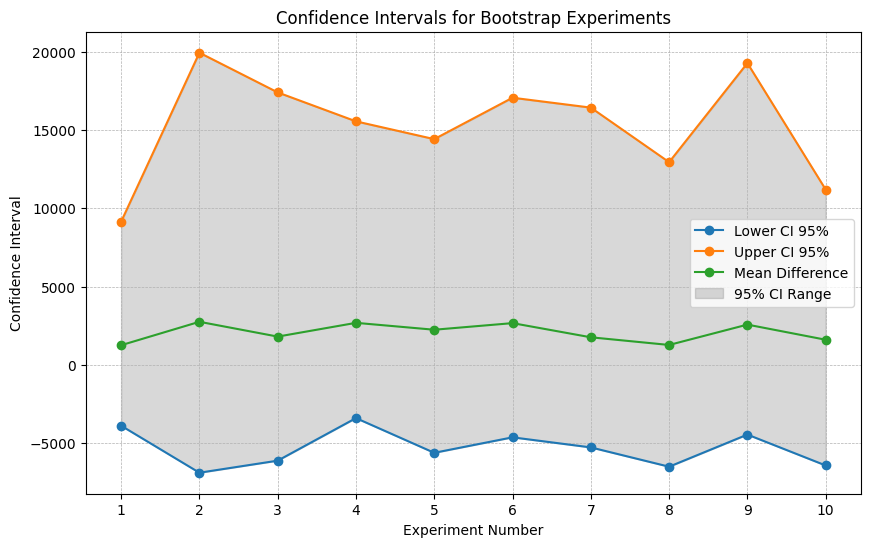

In [12]:
ci_df = pd.DataFrame(ipw_results, columns=["mean", "lower_ci", "upper_ci"])
ci_df["experiment"] = range(1, len(ci_df) + 1)

plt.figure(figsize=(10, 6))

plt.plot(ci_df["experiment"], ci_df["lower_ci"], label="Lower CI 95%", marker="o")
plt.plot(ci_df["experiment"], ci_df["upper_ci"], label="Upper CI 95%", marker="o")
plt.plot(ci_df["experiment"], ci_df["mean"], label="Mean Difference", marker="o")

plt.fill_between(
    ci_df["experiment"],
    ci_df["lower_ci"],
    ci_df["upper_ci"],
    color="gray",
    alpha=0.3,
    label="95% CI Range",
)

plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.xticks(ci_df["experiment"])
plt.xlabel("Experiment Number")
plt.ylabel("Confidence Interval")
plt.title("Confidence Intervals for Bootstrap Experiments")
plt.legend()
plt.show()

In [13]:
ci_df

,mean,lower_ci,upper_ci,experiment
0,1244.500836,-3904.967921,9146.671328,1
1,2742.683564,-6911.975393,19954.607747,2
2,1795.572737,-6140.288207,17416.644005,3
3,2675.645046,-3418.410249,15564.585749,4
4,2234.422177,-5638.152611,14426.805194,5
5,2657.283132,-4648.172178,17075.966473,6
6,1751.125077,-5292.868150,16442.969416,7
7,1260.642530,-6527.092760,12953.085165,8
8,2562.866703,-4471.732293,19290.902396,9
9,1594.522719,-6447.973734,11203.540028,10
